#### 김성훈 교수님 강의자료엔 없는 내용입니다

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
x1 = torch.randn(1000, 50)
x2 = torch.randn(1000, 50) + 1.5
x = torch.cat([x1, x2], dim=0)
y1 = torch.zeros(1000, 1)
y2 = torch.ones(1000, 1)
y = torch.cat([y1, y2], dim=0)

In [8]:
x1[:1]

tensor([[-1.4746,  0.3619, -2.3418, -0.0884,  0.3241,  0.9131, -0.6828,
         -0.2386,  0.1600,  0.0165, -0.2315,  0.2335, -0.1876,  0.7221,
          0.8719, -1.1050, -2.0222,  0.3276, -1.7088, -0.8763, -0.2971,
         -0.3725,  0.3476, -0.7874, -1.2079,  1.0027, -1.1696, -0.6749,
         -0.6469, -0.5744, -1.5157,  1.6170, -0.7686, -0.4942, -0.0988,
          0.1820, -0.6486,  0.1045,  0.9504, -0.3014, -1.4971,  0.4788,
          0.3569,  0.1627, -0.4168,  1.7499,  0.6282,  1.0213, -0.1990,
          0.8176]])

In [9]:
y1[:1]

tensor([[ 0.]])

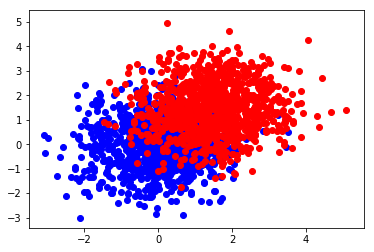

In [7]:
plt.scatter(x1[:, 0], x1[:, 1], color='b')
plt.scatter(x2[:, 0], x2[:, 1], color='r')

#### Create Model

In [10]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(50, 50)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(50, 100)
        self.prelu = nn.PReLU(1)
        self.out = nn.Linear(100, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.prelu(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y

In [11]:
model = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001, betas= (0.9, 0.999))

In [33]:
def train_epoch(model, opt, criterion, batch_size=50):
    model.train()
    losses = []
    for beg_i in range(0, x.size(0), batch_size):
        x_batch = x[beg_i:beg_i + batch_size, :]
        y_batch = y[beg_i:beg_i + batch_size, :]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
#         y_hat = model(x_batch)
        print(y_hat)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
    return losses

tensor([[ 9.2145e-07],
        [ 1.5375e-04],
        [ 3.6153e-04],
        [ 4.4461e-05],
        [ 1.6830e-10],
        [ 3.4790e-04],
        [ 2.4975e-05],
        [ 1.3971e-05],
        [ 3.6012e-06],
        [ 1.6373e-09],
        [ 2.4934e-03],
        [ 5.3145e-07],
        [ 1.6621e-03],
        [ 5.4986e-05],
        [ 9.2969e-06],
        [ 3.9360e-03],
        [ 2.3392e-08],
        [ 1.2756e-05],
        [ 1.5658e-05],
        [ 8.4693e-06],
        [ 4.0646e-04],
        [ 7.5216e-06],
        [ 1.1449e-05],
        [ 1.6233e-03],
        [ 2.7506e-04],
        [ 6.6745e-04],
        [ 8.9155e-05],
        [ 3.6868e-06],
        [ 2.4092e-06],
        [ 4.8032e-05],
        [ 3.5333e-06],
        [ 1.4840e-06],
        [ 7.7022e-07],
        [ 5.0180e-06],
        [ 1.9592e-05],
        [ 1.9980e-06],
        [ 9.1609e-06],
        [ 4.6256e-06],
        [ 7.2334e-05],
        [ 3.1961e-05],
        [ 1.1670e-05],
        [ 1.2816e-04],
        [ 3.0125e-04],
        [ 2

        [ 1.0000]])
tensor([[ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.9906],
        [ 1.0000],
        [ 0.9996],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.9924],
        [ 1.0000],
        [ 1.0000],
        [ 0.9984],
        [ 1.0000],
        [ 0.9993],
        [ 1.0000],
        [ 1.0000],
        [ 0.9999],
        [ 1.0000],
        [ 1.0000],
        [ 0.9999],
        [ 0.9997],
        [ 1.0000],
        [ 0.9998],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.9738],
        [ 1.0000],
        [ 1.0000],
        [ 0.9998],
        [ 1.0000],
        [ 0.9998],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000]])
tensor([[ 1.0000],
        [ 

tensor([[ 3.0489e-06],
        [ 3.5394e-07],
        [ 5.5802e-05],
        [ 3.2437e-06],
        [ 2.3627e-08],
        [ 4.1544e-08],
        [ 7.6509e-09],
        [ 6.9475e-03],
        [ 1.3730e-05],
        [ 2.5891e-06],
        [ 4.0102e-06],
        [ 2.1080e-02],
        [ 1.4571e-04],
        [ 9.0866e-06],
        [ 7.4371e-09],
        [ 2.0463e-08],
        [ 1.5083e-06],
        [ 1.9588e-06],
        [ 2.6141e-04],
        [ 2.3237e-07],
        [ 3.7609e-04],
        [ 6.0567e-04],
        [ 1.2846e-07],
        [ 7.2448e-06],
        [ 8.7313e-09],
        [ 8.4534e-05],
        [ 1.0427e-05],
        [ 1.6423e-04],
        [ 8.5734e-05],
        [ 1.9778e-06],
        [ 1.7098e-06],
        [ 1.7642e-06],
        [ 4.4382e-03],
        [ 5.0600e-06],
        [ 2.7978e-03],
        [ 1.7824e-04],
        [ 1.4637e-04],
        [ 1.0959e-07],
        [ 6.2820e-06],
        [ 1.4259e-06],
        [ 3.6997e-06],
        [ 7.3269e-06],
        [ 6.7665e-07],
        [ 8

tensor([[ 5.4473e-06],
        [ 1.5326e-06],
        [ 3.6894e-05],
        [ 7.7759e-07],
        [ 1.6137e-04],
        [ 4.6597e-05],
        [ 1.3506e-06],
        [ 1.0699e-06],
        [ 6.3070e-06],
        [ 1.1780e-08],
        [ 1.7038e-03],
        [ 7.1833e-08],
        [ 1.1695e-08],
        [ 8.4928e-08],
        [ 3.0000e-03],
        [ 1.2467e-07],
        [ 2.0741e-05],
        [ 1.3237e-05],
        [ 1.1275e-03],
        [ 3.0699e-03],
        [ 8.5760e-06],
        [ 1.8382e-05],
        [ 1.1047e-05],
        [ 9.7223e-05],
        [ 2.4209e-06],
        [ 3.7460e-05],
        [ 1.0245e-03],
        [ 6.8353e-09],
        [ 4.9285e-04],
        [ 7.3228e-09],
        [ 2.2481e-07],
        [ 4.3993e-04],
        [ 1.7295e-05],
        [ 1.2739e-07],
        [ 3.9605e-05],
        [ 9.7304e-06],
        [ 1.5117e-07],
        [ 4.1467e-07],
        [ 7.2859e-10],
        [ 2.3082e-05],
        [ 1.3205e-03],
        [ 1.0643e-07],
        [ 8.8676e-08],
        [ 7

        [ 1.0000]])
tensor([[ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.9999],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.9994],
        [ 0.9992],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.9999],
        [ 1.0000]])
tensor([[ 1.0000],
        [ 

tensor([[ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.9998],
        [ 0.9999],
        [ 1.0000],
        [ 0.9918],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.9999],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000]])
tensor([[ 1.0000],
        [ 1.0000],
        [ 1

        [ 3.1833e-04]])
tensor([[ 5.9551e-03],
        [ 1.5798e-07],
        [ 1.0135e-03],
        [ 1.3787e-05],
        [ 2.5466e-07],
        [ 1.5324e-04],
        [ 2.0602e-06],
        [ 2.8184e-09],
        [ 3.7149e-06],
        [ 4.3689e-07],
        [ 2.1772e-06],
        [ 2.2643e-08],
        [ 2.1234e-09],
        [ 3.2763e-06],
        [ 2.9128e-04],
        [ 1.2967e-04],
        [ 2.2049e-05],
        [ 1.5265e-07],
        [ 1.2687e-04],
        [ 2.2656e-04],
        [ 1.1504e-04],
        [ 2.4930e-06],
        [ 1.3446e-07],
        [ 5.0838e-03],
        [ 1.3053e-04],
        [ 3.9230e-06],
        [ 1.9137e-06],
        [ 2.6799e-05],
        [ 6.2581e-05],
        [ 2.5779e-04],
        [ 6.0684e-06],
        [ 4.9012e-11],
        [ 1.9529e-07],
        [ 3.5458e-05],
        [ 1.6763e-06],
        [ 2.8953e-03],
        [ 4.7349e-06],
        [ 8.5100e-06],
        [ 6.8299e-06],
        [ 4.6116e-10],
        [ 1.6283e-08],
        [ 7.1470e-06],
        [ 

        [ 1.0000]])
tensor([[ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.4240],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.9999],
        [ 1.0000],
        [ 1.0000],
        [ 0.9998],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.9943],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000]])
tensor([[ 1.0000],
        [ 

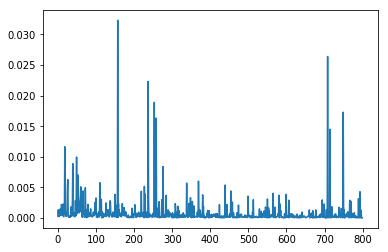

In [34]:
e_losses = []
num_epochs = 20
for e in range(num_epochs):
    e_losses += train_epoch(model, optimizer, criterion)
plt.plot(e_losses)